#### Imports 

In [1]:
# import libraries
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
rcParams['figure.figsize'] = 12, 7
%matplotlib inline

#### Load the dataset

In [2]:
df = pd.read_csv('covid_19_data.csv')


#### Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7926 entries, 0 to 7925
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              7926 non-null   int64  
 1   ObservationDate  7926 non-null   object 
 2   Province/State   4493 non-null   object 
 3   Country/Region   7926 non-null   object 
 4   Last Update      7926 non-null   object 
 5   Confirmed        7926 non-null   float64
 6   Deaths           7926 non-null   float64
 7   Recovered        7926 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 495.5+ KB


In [4]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3433
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [5]:
df['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'British Columbia', 'Bavaria',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'San Benito, CA', 'Toronto, ON', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX', 'None',
       'Humboldt

In [6]:
df["ObservationDate"]=pd.to_datetime(df["ObservationDate"])

In [7]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7921,7922,2020-03-22,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,2020-03-22,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,2020-03-22,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,2020-03-22,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [8]:
bydate=df.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bydate.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


In [9]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(df["Country/Region"].unique()))
print("Total number of Confirmed Cases: ",bydate["Confirmed"].iloc[-1])
print("Total number of Recovered Cases: ",bydate["Recovered"].iloc[-1])
print("Total number of Deaths Cases: ",bydate["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(bydate["Confirmed"].iloc[-1]-bydate["Recovered"].iloc[-1]))

Basic Information
Totol number of countries with Disease Spread:  200
Total number of Confirmed Cases:  335957.0
Total number of Recovered Cases:  97882.0
Total number of Deaths Cases:  14634.0
Total number of Active Cases around the World:  238075.0


#### EDA

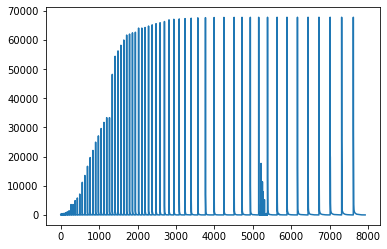

In [10]:
df.Confirmed.plot()

In [11]:
bydate

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-03-18,214915.0,83313.0,8733.0
2020-03-19,242713.0,84962.0,9867.0
2020-03-20,272167.0,87403.0,11299.0


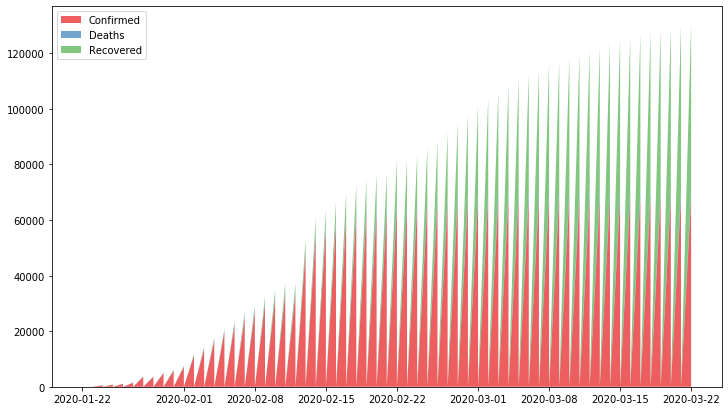

In [12]:
x= df["ObservationDate"].values
y=[df.Confirmed.values, df.Deaths.values, df.Recovered.values]
 
# Plot
pal = sns.color_palette("Set1")
plt.figure(figsize=[12.0, 7.0])
plt.stackplot(x,y, labels=['Confirmed','Deaths','Recovered'], colors=pal, alpha=0.7)
plt.legend(loc='upper left')
plt.show()

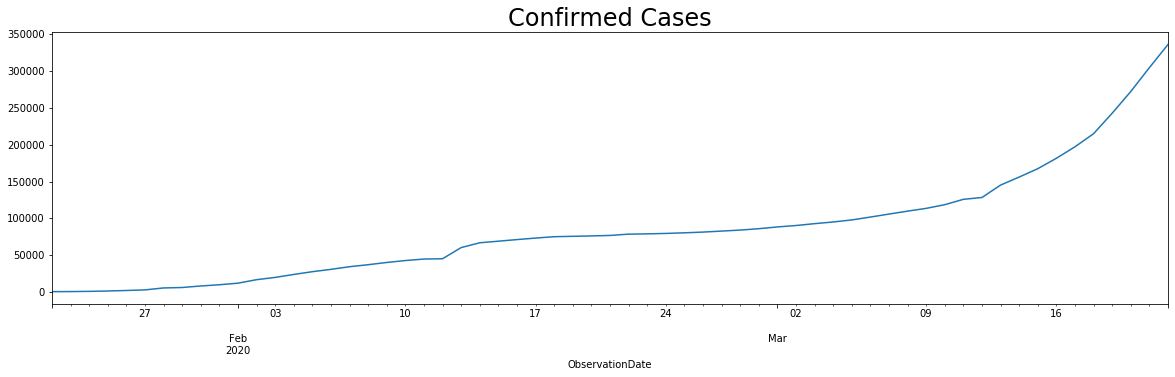

In [14]:
bydate.Confirmed.plot(figsize = (20,5))
plt.title("Confirmed Cases", size= 24)
plt.show()

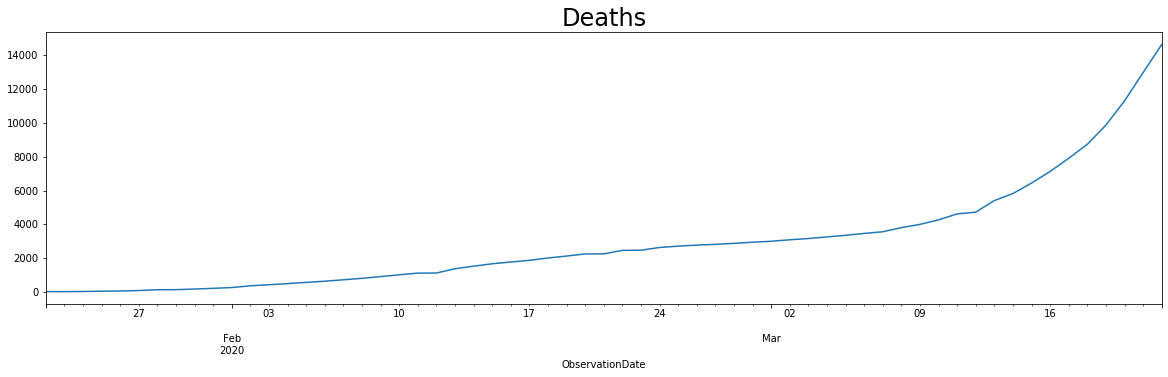

In [15]:
bydate.Deaths.plot(figsize = (20,5))
plt.title("Deaths", size= 24)
plt.show()

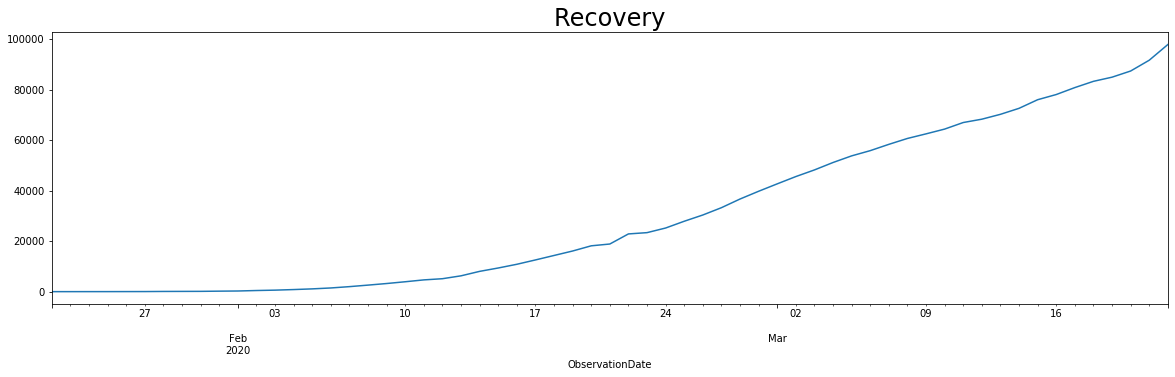

In [16]:
bydate.Recovered.plot(figsize = (20,5))
plt.title("Recovery", size= 24)
plt.show()

#### Models

##### Train_Test_split

In [17]:
bydate=bydate.asfreq('b')

In [18]:
size = int(len(bydate)*0.8)

In [19]:
df_train, df_test = bydate.iloc[:size], bydate.iloc[size:]

In [20]:
sts.adfuller(df_train.Confirmed)

(0.35749835243175193,
 0.979834033765333,
 0,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 446.84844796741805)

In [21]:
sts.adfuller(df_train.Deaths)

(0.7268896472835629,
 0.9903595014404736,
 10,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 287.78318802696754)

In [22]:
sts.adfuller(df_train.Recovered)

(-3.0529090481279635,
 0.030240156204245416,
 5,
 28,
 {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224},
 394.7927297172709)

##### AR(1)

In [23]:
model_ar = ARMA(bydate.Confirmed, order=(1,0))

In [24]:
results_ar = model_ar.fit()

In [25]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                   43
Model:                     ARMA(1, 0)   Log Likelihood                -461.948
Method:                       css-mle   S.D. of innovations          10549.502
Date:                Wed, 25 Mar 2020   AIC                            929.897
Time:                        15:59:51   BIC                            935.181
Sample:                    01-22-2020   HQIC                           931.845
                         - 03-20-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.988e+04   1.63e+05      0.491      0.624   -2.39e+05    3.99e+05
ar.L1.Confirmed     0.9972      0.005    209.955      0.000       0.988       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0028           +0.0000j            1.0028            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
model_ar_2 = ARMA(bydate.Confirmed, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/envs/learn-env/lib/python3.6/site-pa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                   43
Model:                     ARMA(2, 0)   Log Likelihood                -447.471
Method:                       css-mle   S.D. of innovations           6367.883
Date:                Wed, 25 Mar 2020   AIC                            902.943
Time:                        16:04:36   BIC                            909.987
Sample:                    01-22-2020   HQIC                           905.540
                         - 03-20-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.988e+04        nan        nan        nan         nan         nan
ar.L1.Confirmed     1.8775   1.93e-05   9.74e+04      0.000       1.877       1.877
ar.L2.Confirmed    -0.8775      9e-06  -9.74e+04      0.000      -0.877      -0.877
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2            1.1397           +0.0000j            1.1397            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_3 = ARMA(bydate.Confirmed, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

In [ ]:
model_ar_4 = ARMA(bydate.Confirmed, order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

#### Final Model